In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats import endpoints
from nba_api.stats.endpoints import leaguegamefinder

# Nikola Jokića
data = endpoints.leagueleaders.LeagueLeaders() .get_dict()

In [28]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
team_ids = [team['id'] for team in nba_teams]

In [29]:
teams = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_ids[0]).get_data_frames()[0]

In [30]:
from nba_api.stats.endpoints import leaguegamefinder

teams_list = [leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id).get_data_frames()[0] for team_id in team_ids]

In [31]:
years = [str(i) for i in range(1983,2024)]
#years = [str(i) for i in range(1996, 2024)]
team_season_list = []
for team in teams_list:
    game_dates = team["GAME_DATE"]
    team_points = []
    for year in years:
        points = []
        for i, date in enumerate(team["GAME_DATE"]):
            if year in date:
                points.append((year, team["PTS"][i]))
        if points:
            team_points.append(points)
    team_season_list.append(team_points)

In [32]:
print(len(team_season_list[0][12]))
print(team_season_list[0][12])

84
[('1995', 93), ('1995', 96), ('1995', 94), ('1995', 111), ('1995', 94), ('1995', 95), ('1995', 108), ('1995', 78), ('1995', 108), ('1995', 92), ('1995', 102), ('1995', 79), ('1995', 96), ('1995', 98), ('1995', 106), ('1995', 102), ('1995', 114), ('1995', 112), ('1995', 99), ('1995', 108), ('1995', 88), ('1995', 111), ('1995', 113), ('1995', 125), ('1995', 100), ('1995', 96), ('1995', 124), ('1995', 106), ('1995', 89), ('1995', 97), ('1995', 82), ('1995', 87), ('1995', 128), ('1995', 104), ('1995', 94), ('1995', 70), ('1995', 90), ('1995', 110), ('1995', 99), ('1995', 102), ('1995', 96), ('1995', 83), ('1995', 107), ('1995', 108), ('1995', 102), ('1995', 98), ('1995', 74), ('1995', 84), ('1995', 106), ('1995', 122), ('1995', 86), ('1995', 86), ('1995', 104), ('1995', 108), ('1995', 99), ('1995', 111), ('1995', 94), ('1995', 93), ('1995', 118), ('1995', 107), ('1995', 110), ('1995', 88), ('1995', 97), ('1995', 110), ('1995', 99), ('1995', 111), ('1995', 107), ('1995', 78), ('1995', 98

In [33]:
annual_ppg = []
for team in team_season_list:
    team_ppg = []
    for tt in team:
        team_ppg.append(np.mean([t[1] for t in tt]))
    annual_ppg.append(team_ppg)

In [34]:
average_per_year = [np.mean(ppg) for ppg in annual_ppg]
print(len(average_per_year))

30


In [35]:
annual_ppg_matrix = np.asarray(ppg)
annual_ppg_matrix.shape

(41,)

In [36]:
print(len(apy))
print(apy[0])

NameError: name 'apy' is not defined

In [ ]:
print(years)
years = [str(i) for i in range(1996, 2024)]

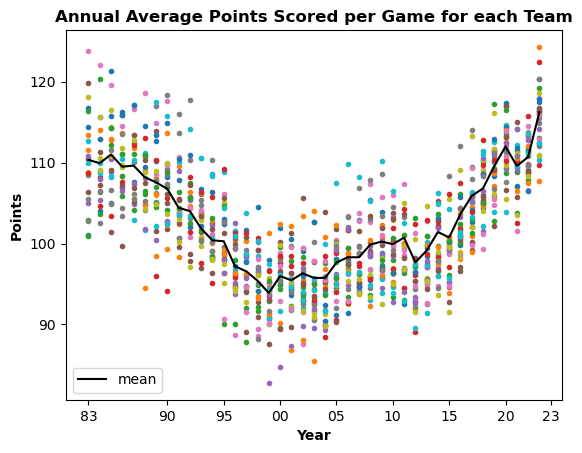

In [37]:
xticks = [83, 90, 95, '00', '05', 10, 15, 20, 23]
xlocs = [0, 7, 12, 17, 22, 27, 32, 37, 41]
#xticks = ['96', '00', '05', 10, 15, 20, 23]
#xlocs = [0, 4, 9, 14, 19, 24, 27]
average_per_year = [0 for i in range(len(years))]
counts_per_year = [0 for i in range(len(years))]
fig, ax = plt.subplots()
for m, ppg in enumerate(annual_ppg):
    start = len(years)-len(ppg)
    ax.plot([i for i in range(start, len(ppg)+start)], ppg, '.')
    for j in range(start, len(ppg)):
        average_per_year[j] = average_per_year[j]+ppg[j]
        counts_per_year[j] = counts_per_year[j]+1
ax.plot([i for i in range(len(years))], np.asarray(average_per_year)/np.asarray(counts_per_year), 'black', label="mean")
ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Points", weight="bold")
ax.set_title("Annual Average Points Scored per Game for each Team", weight="heavy")
ax.legend()
plt.xticks(xlocs, xticks)
plt.savefig("average_points")

In [ ]:
fig, ax = plt.subplots()


In [71]:
team_ppg_list = []
for team in team_season_list:
    ppg_list = []
    for year in years:
    #season_list = []
        for t in team:
            if t[0] == year:
                season_list.append(t[1])
        ppg_list.append(np.mean(season_list))
    team_ppg_list.append(ppg_list)

/Users/derektropf/miniconda3/envs/plotting/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/derektropf/miniconda3/envs/plotting/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [90]:
print(len(team_season_list))
#print(team_season_list[0])

30


In [82]:
team_point_list = [[t[0] for t in team] for team in team_season_list]

In [87]:
print(team_point_list[0])

[('1983', 109), ('1984', 104), ('1985', 100), ('1986', 106), ('1987', 117), ('1988', 117), ('1989', 98), ('1990', 134), ('1991', 125), ('1992', 96), ('1993', 92), ('1994', 85), ('1995', 93), ('1996', 86), ('1997', 90), ('1998', 82), ('1999', 105), ('2000', 85), ('2001', 97), ('2002', 84), ('2003', 83), ('2004', 79), ('2005', 91), ('2006', 81), ('2007', 84), ('2008', 110), ('2009', 101), ('2010', 94), ('2011', 84), ('2012', 104), ('2013', 92), ('2014', 109), ('2015', 121), ('2016', 105), ('2017', 104), ('2018', 108), ('2019', 101), ('2020', 141), ('2021', 121), ('2022', 121), ('2023', 107)]


In [67]:
ppg_list = []
for i, team in enumerate(team_season_list):
    for j, t in enumerate(team):
        if t[0]
#print((team_season_list[0]))

[[('1983', 109), ('1983', 77), ('1983', 112), ('1983', 114), ('1983', 96), ('1983', 98), ('1983', 113), ('1983', 96), ('1983', 94), ('1983', 87), ('1983', 104), ('1983', 92), ('1983', 95), ('1983', 102), ('1983', 92), ('1983', 110), ('1983', 96), ('1983', 115), ('1983', 102), ('1983', 104), ('1983', 104), ('1983', 99), ('1983', 107), ('1983', 105), ('1983', 113), ('1983', 90), ('1983', 84), ('1983', 103), ('1983', 95), ('1983', 117), ('1983', 108)], [('1984', 104), ('1984', 111), ('1984', 117), ('1984', 106), ('1984', 119), ('1984', 129), ('1984', 116), ('1984', 94), ('1984', 93), ('1984', 116), ('1984', 104), ('1984', 127), ('1984', 101), ('1984', 100), ('1984', 106), ('1984', 102), ('1984', 95), ('1984', 96), ('1984', 111), ('1984', 101), ('1984', 122), ('1984', 118), ('1984', 99), ('1984', 99), ('1984', 114), ('1984', 105), ('1984', 99), ('1984', 127), ('1984', 114), ('1984', 104), ('1984', 108), ('1984', 119), ('1984', 89), ('1984', 100), ('1984', 103), ('1984', 87), ('1984', 89), 

In [37]:
print(df)

     SEASON_ID     TEAM_ID TEAM_ABBREVIATION      TEAM_NAME     GAME_ID  \
0        22022  1610612737               ATL  Atlanta Hawks  0022200818   
1        22022  1610612737               ATL  Atlanta Hawks  0022200801   
2        22022  1610612737               ATL  Atlanta Hawks  0022200792   
3        22022  1610612737               ATL  Atlanta Hawks  0022200777   
4        22022  1610612737               ATL  Atlanta Hawks  0022200763   
...        ...         ...               ...            ...         ...   
3564     21983  1610612737               ATL  Atlanta Hawks  0028300058   
3565     21983  1610612737               ATL  Atlanta Hawks  0028300041   
3566     21983  1610612737               ATL  Atlanta Hawks  0028300027   
3567     21983  1610612737               ATL  Atlanta Hawks  0028300014   
3568     21983  1610612737               ATL  Atlanta Hawks  0028300005   

       GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0     2023-02-07  

In [ ]:
#points_list = []
team_names = [team.get_data_frames()[0]["TEAM_NAME"] for team in teams_list]
points_list = [team.get_data_frames()[0]["PTS"] for team in teams_list]
avg_ppg = [np.mean(points) for points in points_list]
#df = teams_list[22].get_data_frames()

In [7]:
print(team_names)

NameError: name 'team_names' is not defined

In [93]:
print(len(l))

86
